<a href="https://colab.research.google.com/github/GSDante/Desafio/blob/main/Desafio_GiovanneSantos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

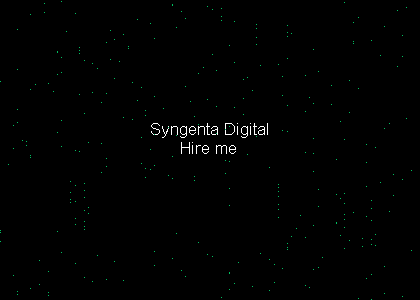

In [10]:
import numpy as np
import pandas as pd
import cv2 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
from collections import Counter
import matplotlib.pylab as plt
from scipy.signal import correlate



url = "https://i.imgur.com/kHtsQQy.png"
image = io.imread(url) 
cv2_imshow(image)

##1.Conte a quantidande de pixels verdes:

###Passando a imagem para escala em cinza, pois iráá facilitar na classificaçãão de cores:

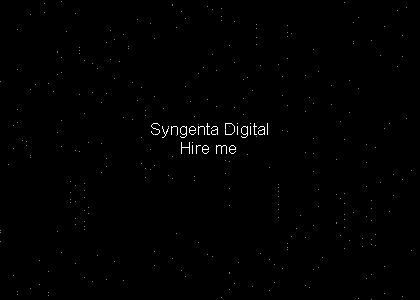

In [11]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_gray)

###Agora iremos verificar quais valores há diferente de 0 e 255, ou seja, que não são pixels brancos e nem pixels pretos:

In [12]:
values = {}
for i in range(image_gray.shape[0]):
  for j in range(image_gray.shape[1]):
    if image_gray[i][j] != 0 and image_gray[i][j] != 255:
      if (image_gray[i][j] in values):
        values[image_gray[i][j]] += 1
      else:
        values[image_gray[i][j]] = 1

for key, value in values.items():
        print ("% d : % d pixels"%(key, value))

 124 :  298 pixels


###Então, como só há esse valor diferente de 0 e 255, então temos que 124 representa os pixels verdes em escala de cinza, logo háá 298 pixels verdes na imagem.

##2. A imagem possui uma mensagem escondida, descubra qual a mensagem.

Primeiramente, irei remover a mensangem "Syngenta Digital Hire me", ou seja, os pixels brancos:

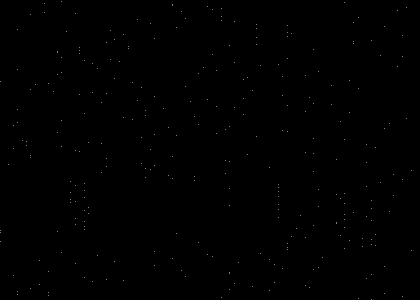

In [13]:
for i in range(image_gray.shape[0]):
  for j in range(image_gray.shape[1]):
    if image_gray[i][j] == 255:
      image_gray[i][j] = 0

cv2_imshow(image_gray)

Agora, na primeira tentativa, irei aplicar dilatação e erosão para tentar identificar algum padrão. Em seguida, utilizarei um detecto de bordas que usa a téécnica de Canny.


                                Imagem erodida                                



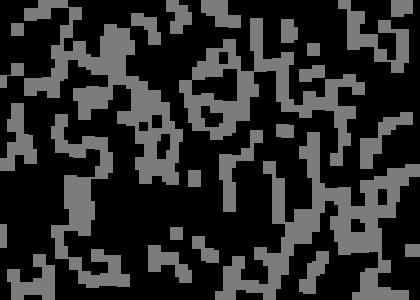


Bordas Encontradas



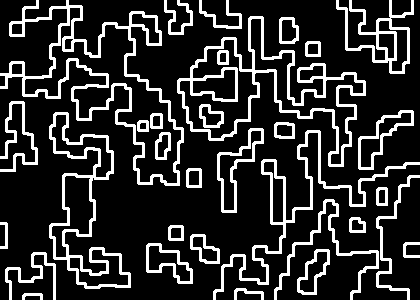

In [14]:
kernel = np.ones((5,5),np.uint8)


#Utilizando erosão e dilatão para para criar as bordas das imagens 
dilation = cv2.dilate(image_gray,kernel,iterations = 5)
erosion = cv2.erode(dilation,kernel,iterations = 2)



print("\n                                Imagem erodida                                \n")
cv2_imshow(erosion)

edges = cv2.Canny(erosion,50,100)
brasil_c = image_gray.copy()
kernelEdges = np.ones((3,3),np.uint8)

#Aplicando dilatação para reforçar as bordas
edges = cv2.dilate(edges,kernelEdges,iterations = 1)
print("\nBordas Encontradas\n")
cv2_imshow(edges)

Nesta tentativa, tenho algumas letras formadas pelas bordas como o "S" e "E" na parte do esquerda e meio da imagem, "A", "G" e "A".